# Assignment 2-b   - Mirsaeid Abolghasemi

b) Low level tensorflow code - Use gradient tape and low level tensorflow code (do not use keras) to build a linear classifier. 

In [13]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# Building a linear classifier applying GradientTape using low level Tensorflow

Defining input dimension which is 2, output dimension which is 1 and the learninf rate which we select 0.01

In [25]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

Defining the weight matrix (w)

In [26]:
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))

Defining the bias vector (b)

In [36]:
b = tf.Variable(tf.zeros(shape=(output_dim,)))

In [27]:
def compute_predictions(features):
  return tf.matmul(features, w) + b

The function for computing the loss

In [28]:
def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

Function to train using GradientTape and returns loss


In [29]:
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

# Creating random data to show the model with different sample numbers

num_samples = 100

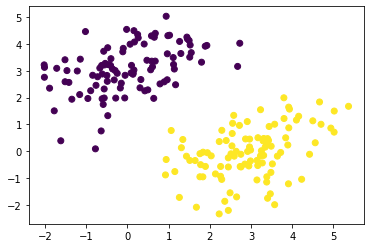

In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

num_samples = 100
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

num_samples = 1000

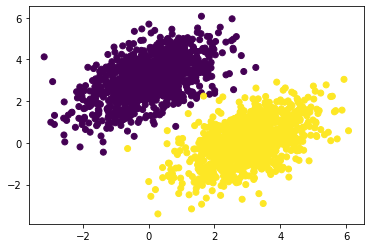

In [31]:

num_samples = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

num_samples = 10000

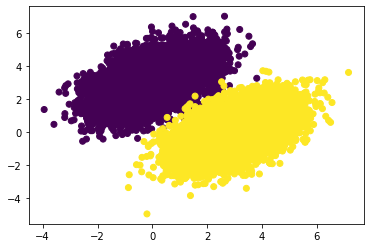

In [32]:

num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

# Training the linear regression 


## Shuffling the data

In [33]:
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

## Iterating over batch-by-batch over the data

In [34]:
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

## Calling train_on_batch repeatedly


In [37]:
for epoch in range(15):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0465
Epoch 1: last batch loss = 0.0504
Epoch 2: last batch loss = 0.0453
Epoch 3: last batch loss = 0.0356
Epoch 4: last batch loss = 0.0267
Epoch 5: last batch loss = 0.0173
Epoch 6: last batch loss = 0.0302
Epoch 7: last batch loss = 0.0232
Epoch 8: last batch loss = 0.0246
Epoch 9: last batch loss = 0.0244
Epoch 10: last batch loss = 0.0244
Epoch 11: last batch loss = 0.0263
Epoch 12: last batch loss = 0.0287
Epoch 13: last batch loss = 0.0214
Epoch 14: last batch loss = 0.0307


# Scatter plot of the model

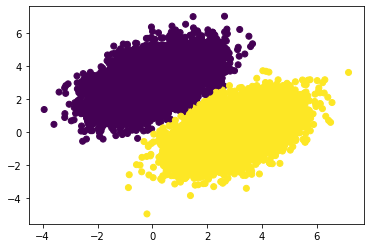

In [38]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

Using tf.function to make the train faster and see how fast it can be:

In [39]:
import time

t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0

print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.114 s


# Compiling the training function into a static graph with adding the tf.function decorator

In [40]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

## Checking how fast will be the train with the new train_on_batch function added tf.function decorator

In [41]:
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end2 = time.time() - t0


print('Time per epoch: %.3f s' % (t_end2/20, ))

Time per epoch: 0.070 s


In [53]:
first = t_end/20
second = t_end2/20

In [56]:
print("The time reduction:", str(round((first - second)*100/first,2))+"%")

The time reduction: 38.67%
